# FD2425
Jorge Machado 21181


Imports

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import csv
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.svm import LinearSVR, NuSVR


Open dataset

O dataset que será utilizado foi retirado deste website (https://www.kaggle.com/datasets/abdullahempapy/used-cars-price) e representa o preço dos carros usados. No entanto, este dataset é referente a carros existentes no Egito, então o preço do carro estará na moeda local. Conversões serão feitas a este preço de acordo com o câmbio atual da moeda: 1 libra egípcia aproximadamente 0,019 euros.

O dataset inclui:

- Modelo do carro
- Ano em que foi fabricado
- Tipo de caixa de velocidades (automática ou manual)
- Tipo de combustível
- Cor
- Preço

Foi necessário fazer alterações ao dataset original, pois havia erros nas datas dos carros. Para isto, foi escolhida a data mais próxima. Por exemplo, havia datas como 2025 (9 dados) e 20224 (1 dado), ambas as datas foram alteradas para 2024, pois considerei como erro na escrita do dataset.


In [476]:
# >convert table
Data_set_data = {
    
    'Car_Model' : [],
    'Year' : [],
    'Gearbox_type' : [],
    'Fuel_type' : [],
    'Mileage' : [],
    'Color' : [],
    'Price' : [] , 
}

In [477]:
folder = r"C:\Users\jorgi\OneDrive\Documentos\Fusao_Dados\Fusao_Dados\Cars_Dataset.csv"

with open(folder, 'r') as file:
  csvreader = csv.reader(file)
  
  for row in csvreader:
  
      Data_set_data['Car_Model'].append(row[0])
      Data_set_data['Year'].append(row[1])
      Data_set_data['Mileage'].append(row[2])
      Data_set_data['Color'].append(  row[3])
      Data_set_data['Gearbox_type'].append(row[4])
      Data_set_data['Fuel_type'].append(row[5])
      Data_set_data['Price'].append(row[6])

Passagem do dicionario para dataframe, e também é mostrado um resumo da informação do dataset.

A função describe retorna:

-   count : representa o valor total de todos os dados  
-   unique  
-   top     
-   freq    
-   Car_Model       
-   Year            
-   Gearbox_type    
-   Fuel_type       
-   Mileage         
-   Color           
-   Price           


In [478]:
df = pd.DataFrame(Data_set_data)
print(df.describe())  # Statistical summary
print(df.isnull().sum()) # missing values

         Car_Model  Year Gearbox_type Fuel_type  Mileage   Color    Price
count          599   599          599       599      599     599      599
unique         196    17            2         4      248      25      271
top     KIA Cerato  2022    Automatic  Gasoline  130,000  Silver  650,000
freq            27    74          526       552       16     132       11
Car_Model       0
Year            0
Gearbox_type    0
Fuel_type       0
Mileage         0
Color           0
Price           0
dtype: int64


Aqui é feita a conversão da moeda, inicialmente esta tanto como Preço como a Kilometragem do carro são convertidas de string para float.

In [479]:
exchange_rate = 0.019  

# passagem de string para float (p.e 100,000 para 100000)
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df['Mileage'] = df['Mileage'].astype(str).str.replace(',', '').astype(float)

# conversão de preço para EUR
df['Price_EUR'] = df['Price'] * exchange_rate  

# print(df[['Price', 'Price_EUR']].head())
# print(df['Mileage'].head())




In [480]:
X = df[['Car_Model','Year', 'Mileage', 'Color', 'Gearbox_type', 'Fuel_type']]
y = df['Price_EUR']

# Encode categorical features
X = pd.get_dummies(X, columns=['Car_Model','Color', 'Gearbox_type', 'Fuel_type','Mileage','Year'], drop_first=True)

Como é para seguir a lógica de 60 - 20 - 20, na função trans_test_split foi dado o parametro 0.20 representando então os 20%


represent the proportion of the dataset to include in the test split.

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size= 0.60 , random_state=50)

# Supervised Learning

Regression = learn f with continuous output values

In [482]:
# random forest model
model = LinearSVR(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


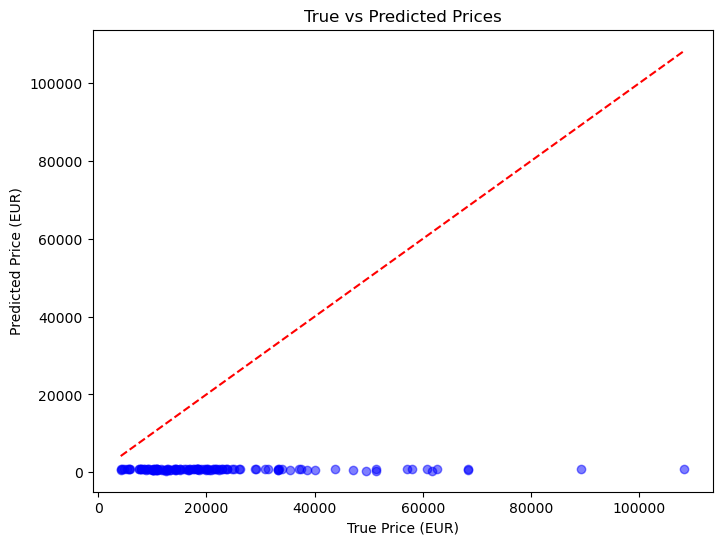

In [483]:
# Scatter plot of true vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('True Price (EUR)')
plt.ylabel('Predicted Price (EUR)')
plt.title('True vs Predicted Prices')
plt.show()

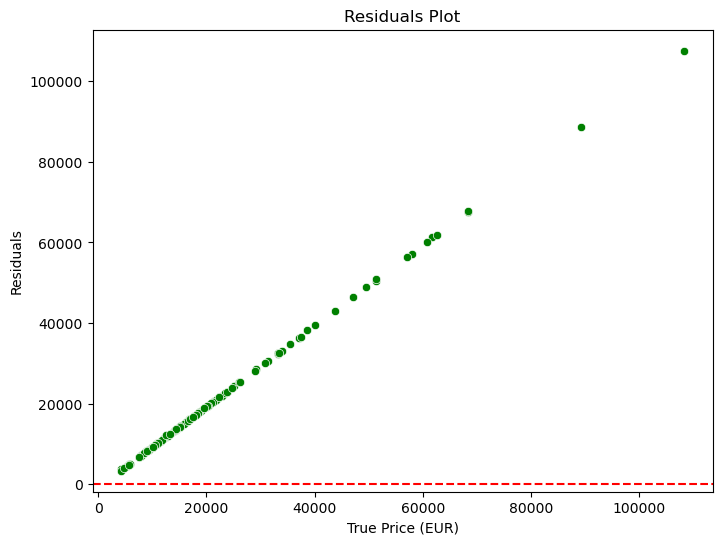

In [484]:
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('True Price (EUR)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

Metricas utilizadas para a regressão

# MSE – Mean Squared error [1]
Mede a diferença média quadrática entre os valores previstos e os valores reais no conjunto de dados.

**Vantagens:**

- Fornece uma medida abrangente da precisão do modelo.
- Sensível tanto a grandes quanto a pequenos erros.
- Fácil de calcular e interpretar.

**Limitações:**

- Pode ser fortemente influenciado por outliers.
- Penaliza erros grandes de forma desproporcional, o que pode nem sempre ser desejável.

# MAE – Mean Absolute Error [2]
O Erro Médio Absoluto calcula a diferença média entre os valores calculados e os valores reais.

**Vantagens:**

- Interpretabilidade: MAE fornece uma medida direta do erro médio, calculando a diferença absoluta média entre os valores previstos e os valores reais. Por exemplo, um MAE de 5 indica que as previsões, em média, desviam-se em 5 unidades dos valores reais.
- Robustez a Outliers: MAE é resiliente a outliers, tratando todos os erros de forma igual. Ao contrário do Erro Quadrático Médio (MSE), que penaliza discrepâncias maiores de forma mais intensa, o MAE mantém estabilidade e confiabilidade quando os conjuntos de dados incluem outliers.
- Aplicação Prática: MAE é útil em cenários do mundo real onde os custos de erro são lineares, como previsão de demanda ou estimativa de preços de imóveis. Ele oferece insights sobre os tamanhos médios dos erros, tornando-se uma métrica preferida para avaliar a qualidade da previsão com base no erro absoluto em vez do erro relativo.
- Penalidade Linear: A natureza linear do MAE significa que o impacto de cada erro na aprendizagem do modelo é diretamente proporcional à sua magnitude. Isso permite que o modelo minimize os erros médios sem focar desproporcionalmente em discrepâncias maiores, garantindo um desempenho equilibrado em todos os pontos de dados.

# MAPE – Mean Absolute Percentage Error [3]
- O termo MAPE determina quão melhor é a precisão da nossa previsão.
- O melhor valor para MAPE é 0, enquanto um valor mais alto indica que as previsões não são precisas o suficiente. No entanto, o quão grande deve ser um valor MAPE para ser considerado uma previsão ineficiente depende do caso de uso.

# MDAE – Median Absolute Error [4]
A principal vantagem de usar essa métrica é sua forte resiliência a outliers.

[1] `https://www.geeksforgeeks.org/mean-squared-error/`  
[2] `https://www.geeksforgeeks.org/how-to-calculate-mean-absolute-error-in-python/`  
[3] `https://www.geeksforgeeks.org/how-to-calculate-mape-in-python/`  
[4] `https://insidelearningmachines.com/median_absolute_error/` 

In [485]:

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
mdae = metrics.median_absolute_error(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("Median Absolute Error:", mdae)




Mean Squared Error: 781136730.9416667
Mean Absolute Error: 21628.175
Mean Absolute Percentage Error: 0.94759016046078
Median Absolute Error: 16484.5


Testes com dados random 

In [486]:
# Example: Predicting car prices using new data
new_data = [['Hyundai Elantra',2009, 140451, 'Eggplant', 'Automatic', 'Gasoline']]  # Example new data point

# Create a DataFrame with the same columns as the training data
new_data_df = pd.DataFrame(new_data, columns=['Car_Model','Year', 'Mileage', 'Color', 'Gearbox_type', 'Fuel_type'])

# One-hot encode the new data
new_data_encoded = pd.get_dummies(new_data_df)

# Align the new data with the training data columns
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict the price
new_price = model.predict(new_data_encoded)
print(f"Predicted Price: {new_price[0]} EUR")

Predicted Price: 690.0 EUR
